# Social Network Analysis with the Facebook100 Dataset

In [96]:
import networkx as nx 
import matplotlib.pyplot as plt
import math

from progressbar import progressbar

from random import random, randint
import random
import torch

In [ ]:
g_caltech = nx.read_graphml("./fb100/Caltech36.graphml")
g_mit = nx.read_graphml("./fb100/MIT8.graphml")
g_hopkins = nx.read_graphml("./fb100/Johns Hopkins55.graphml")

# Degree Distributions of the 3 graphs and some metrics

Text(0.5, 1.0, 'Johns Hopkins Degree distribution')

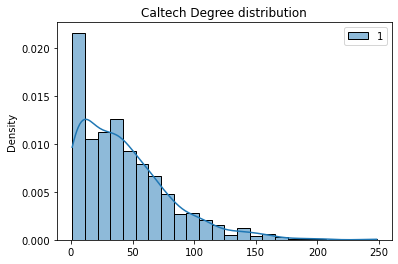

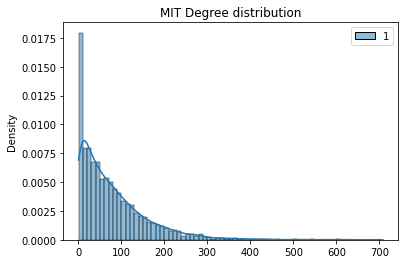

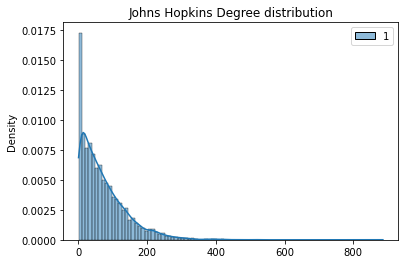

In [ ]:
import seaborn as sns
plt.figure()
caltech_degrees = g_caltech.degree()
sns.histplot(caltech_degrees, stat="density", kde=True)
plt.title("Caltech Degree distribution")

plt.figure()
mit_degrees = g_mit.degree()
sns.histplot(mit_degrees, stat="density", kde=True)
plt.title("MIT Degree distribution")

plt.figure()
hopkins_degrees = g_hopkins.degree()
sns.histplot(hopkins_degrees, stat="density", kde=True)
plt.title("Johns Hopkins Degree distribution")

In [ ]:
gcc_caltech = nx.transitivity(g_caltech)
gcc_mit = nx.transitivity(g_mit)
gcc_hopkins = nx.transitivity(g_hopkins)

print("GCC Caltech =", gcc_caltech)
print("GCC MIT =", gcc_mit)
print("GCC Johns Hopkins =", gcc_hopkins)

GCC Caltech = 0.2912826901150874
GCC MIT = 0.18028845093502427
GCC Johns Hopkins = 0.19316123901594015


In [ ]:
local_cc_caltech = nx.average_clustering(g_caltech)
local_cc_mit = nx.average_clustering(g_mit)
local_cc_hopkins = nx.average_clustering(g_hopkins)

print("Local Clustering Coefficient Caltech =", gcc_caltech)
print("Local Clustering Coefficient MIT =", gcc_mit)
print("Local Clustering Coefficient Johns Hopkins =", gcc_hopkins)

Local Clustering Coefficient Caltech = 0.2912826901150874
Local Clustering Coefficient MIT = 0.18028845093502427
Local Clustering Coefficient Johns Hopkins = 0.19316123901594015


In [ ]:
density_caltech = nx.density(g_caltech)
density_mit = nx.density(g_mit)
density_hopkins = nx.density(g_hopkins)

print("Density Caltech =", density_caltech)
print("Density MIT =", density_mit)
print("Density Johns Hopkins =", density_hopkins)

Density Caltech = 0.05640442132639792
Density MIT = 0.012118119495041378
Density Johns Hopkins = 0.013910200162372396


In [ ]:
caltech_degrees = dict(caltech_degrees)
clustering_caltech = dict(nx.clustering(g_caltech))

mit_degrees = dict(mit_degrees)
clustering_mit = dict(nx.clustering(g_mit))

hopkins_degrees = dict(hopkins_degrees)
clustering_hopkins = dict(nx.clustering(g_hopkins))

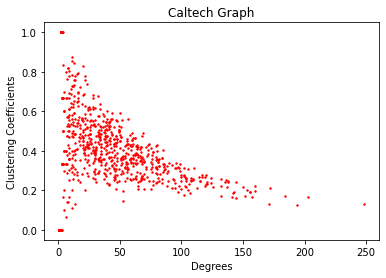

In [ ]:
plt.scatter(list(caltech_degrees.values()), list(clustering_caltech.values()), s= 2, color= "red")
plt.title("Caltech Graph")
plt.xlabel("Degrees")
plt.ylabel("Clustering Coefficients")
plt.show()

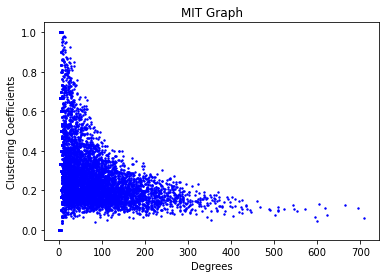

In [ ]:
plt.scatter(list(mit_degrees.values()), list(clustering_mit.values()), s= 2, color= "blue")
plt.title("MIT Graph")
plt.xlabel("Degrees")
plt.ylabel("Clustering Coefficients")
plt.show()

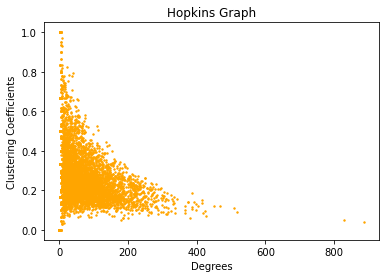

In [ ]:
plt.scatter(list(hopkins_degrees.values()), list(clustering_hopkins.values()), s= 2, color= "orange")
plt.title("Hopkins Graph")
plt.xlabel("Degrees")
plt.ylabel("Clustering Coefficients")
plt.show()

# Assortativity patterns for all the FB graphs

In [ ]:
import glob
list_of_files = glob.glob("./fb100/*.graphml")

In [ ]:
l_size=[]
l_assortativity_fac=[]
l_assortativity_major=[]
l_assortativity_degree=[]
l_assortativity_dorm=[]

for i in progressbar(range(len(list_of_files))):
  f = list_of_files[i]
  g = nx.read_graphml(f)
  l_size.append(g.size())
  l_assortativity_fac.append(nx.attribute_assortativity_coefficient(g, "student_fac"))
  l_assortativity_major.append(nx.attribute_assortativity_coefficient(g, "major_index"))
  l_assortativity_degree.append(nx.degree_assortativity_coefficient(g))
  l_assortativity_dorm.append(nx.attribute_assortativity_coefficient(g, "dorm"))

100% (100 of 100) |######################| Elapsed Time: 0:36:50 Time:  0:36:50


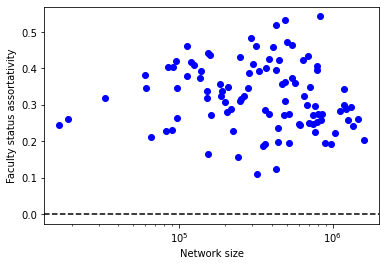

In [ ]:
plt.figure()
plt.scatter(l_size, l_assortativity_fac, color="blue")
plt.xscale("log")
plt.xlabel("Network size")
plt.ylabel("Faculty status assortativity")
plt.axhline(y=0, color="black", ls="--")
plt.show()

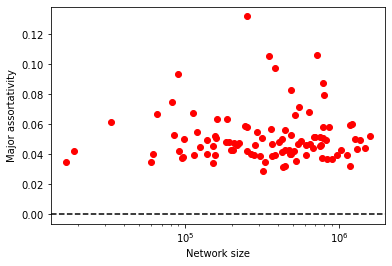

In [ ]:
plt.figure()
plt.scatter(l_size, l_assortativity_major, color="red")
plt.xscale("log")
plt.xlabel("Network size")
plt.ylabel("Major assortativity")
plt.axhline(y=0, color="black", ls="--")
plt.show()

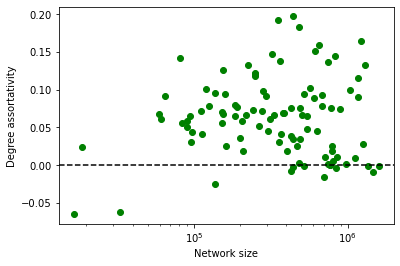

In [ ]:
plt.figure()
plt.scatter(l_size, l_assortativity_degree, color="green")
plt.xscale("log")
plt.xlabel("Network size")
plt.ylabel("Degree assortativity")
plt.axhline(y=0, color="black", ls="--")
plt.show()

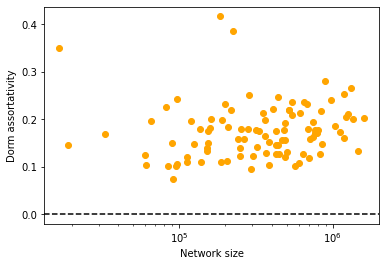

In [ ]:
plt.figure()
plt.scatter(l_size, l_assortativity_dorm, color="orange")
plt.xscale("log")
plt.xlabel("Network size")
plt.ylabel("Dorm assortativity")
plt.axhline(y=0, color="black", ls="--")
plt.show()

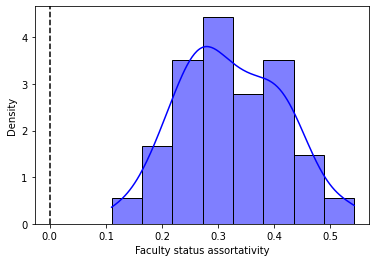

In [ ]:
plt.figure()
sns.histplot(l_assortativity_fac, stat="density", kde=True, color="blue")
plt.xlabel("Faculty status assortativity")
plt.axvline(x=0, color="black", ls="--")
plt.show()

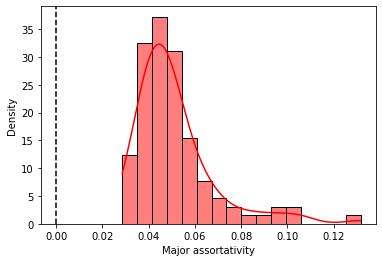

In [ ]:
plt.figure()
sns.histplot(l_assortativity_major, stat="density", kde=True, color="red")
plt.xlabel("Major assortativity")
plt.axvline(x=0, color="black", ls="--")
plt.show()

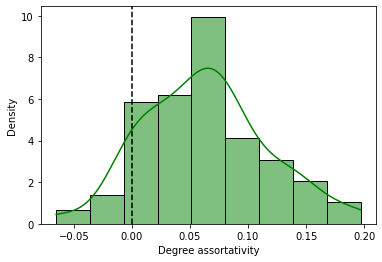

In [ ]:
plt.figure()
sns.histplot(l_assortativity_degree, stat="density", kde=True, color="green")
plt.xlabel("Degree assortativity")
plt.axvline(x=0, color="black", ls="--")
plt.show()

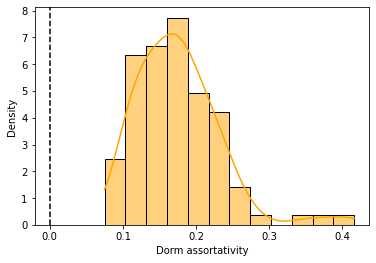

In [ ]:
plt.figure()
sns.histplot(l_assortativity_dorm, stat="density", kde=True, color="orange")
plt.xlabel("Dorm assortativity")
plt.axvline(x=0, color="black", ls="--")
plt.show()

# Link Prediction

In [86]:
from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np
import itertools 

class LinkPrediction ( ABC ) :
    def __init__ ( self , graph ) :
        """
        Constructor

        Parameters
        ----------
            graph : Networkx graph
        """
        self . graph = graph
        self . N = len ( graph )

    def neighbors ( self , v ) :
        """
        Return the neighbors list of a node

        Parameters
        ----------
            v : int
                node id

        Return
        ------
            neighbors_list : python list
        """
        neighbors_list = self . graph . neighbors ( v )
        return list ( neighbors_list )

    @abstractmethod
    def fit ( self ) :
        raise NotImplementedError ( " Fit must be implemented " )

class CommonNeighbors ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( CommonNeighbors , self ) . __init__ ( graph )

    def fit(self):
        cn = []
        pairs = list(itertools.combinations(self.graph.nodes(), 2))
        for k in progressbar(range(len(pairs))):
            i, j = pairs[k]
            Ni = set(self.neighbors(i))
            Nj = set(self.neighbors(j))
            cn_ij = len(Ni.intersection(Nj))
            cn.append((i, j, cn_ij))
        cn.sort(key=lambda tup: tup[2], reverse=True)
        self.cn = cn
        return cn
        
    def predict(self):
        total = self.graph.number_of_edges()
        n = randint(total//5, total)
        pred = np.delete(self.cn, 2, axis=1)
        pred = list(map(tuple, pred))
        pred = pred[:n]
        return pred
        

class Jaccard ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( Jaccard , self ) . __init__ ( graph )

    def fit(self):
        jaccard_coef = []
        pairs = list(itertools.combinations(self.graph.nodes(), 2))
        for k in progressbar(range(len(pairs))):
            i, j = pairs[k]
            Ni = set(self.neighbors(i))
            Nj = set(self.neighbors(j))
            inter = len(Ni.intersection(Nj))
            union = len(Ni.union(Nj))
            if union == 0:
                inter_union = 0
            else:
                inter_union = inter/union
            jaccard_coef.append((i, j, inter_union))
        jaccard_coef.sort(key=lambda tup: tup[2], reverse=True)
        self.jaccard = jaccard_coef
        return jaccard_coef

    def predict(self):
        total = self.graph.number_of_edges()
        n = randint(total//5, total)
        pred = np.delete(self.jaccard, 2, axis=1)
        pred = list(map(tuple, pred))
        pred = pred[:n]
        return pred


class AdamicAdar ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( AdamicAdar , self ) . __init__ ( graph )

    def fit(self):
        adamic = []
        pairs = list(itertools.combinations(self.graph.nodes(), 2))
        for k in progressbar(range(len(pairs))):
            i, j = pairs[k]
            Ni = set(self.neighbors(i))
            Nj = set(self.neighbors(j))
            inter = Ni.intersection(Nj)
            neighbor_of_inter = [len(set(self.neighbors(n))) for n in inter]
            s = np.sum(1/np.log( neighbor_of_inter ))
            adamic.append((i, j, s))
        adamic.sort(key=lambda tup: tup[2], reverse=True)
        self.adamic = adamic
        return adamic

    def predict(self):
        total = self.graph.number_of_edges()
        n = randint(total//5, total)
        pred = np.delete(self.adamic, 2, axis=1)
        pred = list(map(tuple, pred))
        pred = pred[:n]
        return pred
        

## Implementing these link prediction metrics on three graphs

In [80]:
g_caltech = nx.read_graphml("./fb100/Caltech36.graphml")
g_reed = nx.read_graphml("./fb100/Reed98.graphml")
g_simmons = nx.read_graphml("./fb100/Simmons81.graphml")

In [87]:
def prediction_routine(g, method):
    metric = None
    if method == "cn":
        metric = CommonNeighbors(g)
    elif method == "jaccard":
        metric = Jaccard(g)
    elif method == "adamic":
        metric = AdamicAdar(g)
    else:
        print("Please specify a Link Prediction metric")
        return

    metric.fit()

    e_pred = metric.predict()
    return metric, e_pred

In [88]:
def prediction_score2(e_true, e_pred):
    tp = set(e_true).intersection(set(e_pred))
    return len(tp)

In [91]:
def link_prediction(g, method):
    f = 0.2
    e_subset = random.sample(g.edges(), int(f * g.number_of_edges()))
    e_removed = g.copy()
    e_removed.remove_edges_from(e_subset) 
    _, e_pred = prediction_routine(e_removed, method)
    nb_e_pred = prediction_score2(e_subset, e_pred)
    return e_pred, nb_e_pred, len(e_subset)

In [92]:
methods = ["cn", "jaccard", "adamic"]
G = {"Caltech": g_caltech, "Reed": g_reed, "Simmons": g_simmons}
for name in G.keys():
    e_pred_cn, nb_e_pred_cn, total = link_prediction(G[name], "cn")
    e_pred_jaccard, nb_e_pred_jaccard, _ = link_prediction(G[name], "jaccard")
    e_pred_adamic, nb_e_pred_adamic, _ = link_prediction(G[name], "adamic") 

    print(f"{name}:")
    print(f"\tCommon Neighbors: {nb_e_pred_cn} over {total}")
    print(f"\tJaccard: {nb_e_pred_jaccard} over {total}")
    print(f"\tAdamic-Adar: {nb_e_pred_adamic} over {total}")
    print()

100% (295296 of 295296) |################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (295296 of 295296) |################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (295296 of 295296) |################| Elapsed Time: 0:00:20 Time:  0:00:20
  0% (0 of 462241) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

Caltech:
	Common Neighbors: 522 over 3331
	Jaccard: 1415 over 3331
	Adamic-Adar: 1151 over 3331



100% (462241 of 462241) |################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (462241 of 462241) |################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (462241 of 462241) |################| Elapsed Time: 0:00:27 Time:  0:00:27


Reed:
	Common Neighbors: 1288 over 3762
	Jaccard: 1407 over 3762
	Adamic-Adar: 1111 over 3762



100% (1151403 of 1151403) |##############| Elapsed Time: 0:00:14 Time:  0:00:14
100% (1151403 of 1151403) |##############| Elapsed Time: 0:00:19 Time:  0:00:19
100% (1151403 of 1151403) |##############| Elapsed Time: 0:00:56 Time:  0:00:56


Simmons:
	Common Neighbors: 2053 over 6597
	Jaccard: 1425 over 6597
	Adamic-Adar: 901 over 6597



# Label Propagation Algorithm

In [98]:
g_duke = nx.read_graphml("./fb100/Duke14.graphml")
N = len(g_duke.nodes())

P = np.zeros((N, N))
for n in g_duke.nodes():
    deg = len(g_duke.adj[n])
    for nbr in g_duke.adj[n]:
        P[int(n)][int(nbr)] = 1/deg
P_tensor = torch.tensor(P)

In [99]:
def label_propagation(Y, P_tensor, fixed_labels):
    while (True):
        Y_tensor = torch.tensor(Y)
        Y_tensor = torch.matmul(P_tensor, Y_tensor)
        Y_new = Y_tensor.numpy()
        for label in fixed_labels.keys():
            Y_new[label] = Y[label]
        if (Y_new == Y).all():
            break
        else:
            Y = Y_new
    return Y

In [100]:
def label_matrix(G,attr):
    labels = np.unique(list(nx.get_node_attributes(G,attr).values()))
    index_map = {}
    for label in labels:
        if not label == 0:
            index_map[label] = len(index_map)

    N = len(G.nodes)
    M = len(index_map)

    Y = np.zeros((N, M))
    fixed_labels = {}

    for node in G.nodes.data(attr):
        node_attr = node[1]
        node_index = int(node[0])
        if not node_attr == 0:
            Y[node_index][index_map[node_attr]] = 1
            fixed_labels[node_index] = index_map[node_attr]
    
    return Y, fixed_labels

In [104]:
def delete_labels(Y, prob, fixed_labels):
    deleted_labels = []
    for i in range(len(Y)):
        if random.random() < prob and i in fixed_labels.keys():
            Y[i] = np.zeros((1,len(Y[i])))
            deleted_labels.append(i)
            
    return Y, deleted_labels

In [105]:
def lpa_routine(G, attr, prob, Y_old, fixed_labels):    
    Y_del, deleted_labels = delete_labels(Y_old, prob, fixed_labels)
    correct_labels = {}
    for label in deleted_labels:
        correct_labels[label] = fixed_labels[label]
        fixed_labels.pop(label)

    Y_new = label_propagation(Y_del, P_tensor, fixed_labels)

    correct_predictions = 0
    absolute_error = 0
    N = len(deleted_labels)
    for label in deleted_labels:
        local_max = 0
        local_max_index = -1
        absolute_error = 0
        for i in range(len(Y[label])):
            if Y_new[label][i] > local_max:
                local_max = Y_new[label][i]
                local_max_index = i
            absolute_error += abs(Y_old[label][i] - Y_new[label][i])

        correct_predictions += (local_max_index == correct_labels[label])

    accuracy = correct_predictions / N
    mean_absolute_error = absolute_error / N

    return accuracy, mean_absolute_error

In [116]:
attributes = ["major_index", "dorm", "year", "gender"]
probabilities = [0.1, 0.2, 0.3, 0.4]

ACC = np.zeros((4,4))
MAE = np.zeros((4,4))

for i in progressbar(range(4)):
    Y, fixed_labels = label_matrix(g_duke, attributes[i])
    for j in progressbar(range(4)):
        acc, mae = lpa_routine(g_duke, attributes[i], probabilities[j], Y, fixed_labels)
        ACC[i][j] = acc
        MAE[i][j] = mae

100% (4 of 4) |##########################| Elapsed Time: 0:03:57 Time:  0:03:57
100% (4 of 4) |##########################| Elapsed Time: 0:10:44 Time:  0:10:44
100% (4 of 4) |##########################| Elapsed Time: 0:03:51 Time:  0:03:51
100% (4 of 4) |##########################| Elapsed Time: 0:01:47 Time:  0:01:47
100% (4 of 4) |##########################| Elapsed Time: 0:20:20 Time:  0:20:20


In [117]:
import pandas as pd 

indexes = ["Major", "Dorm", "Year", "Gender"]

# Accuracy of LPA
df_ACC = pd.DataFrame(data=ACC, index=indexes, columns=probabilities)

# Mean Absolute Error of LPA
df_MAE = pd.DataFrame(data=MAE, index=indexes, columns=probabilities)

In [118]:
df_ACC

,0.1,0.2,0.3,0.4
Major,0.274847,0.250176,0.245384,0.196960
Dorm,0.560345,0.520734,0.481070,0.393764
Year,0.904918,0.900242,0.887255,0.844935
Gender,0.673446,0.667276,0.661402,0.673414


In [119]:
df_MAE

,0.1,0.2,0.3,0.4
Major,0.001227,0.000703,0.000596,0.000633
Dorm,0.001437,0.000797,0.000653,0.000725
Year,0.001093,0.000605,0.000545,0.000566
Gender,0.001130,0.000609,0.000494,0.000547
